<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Pytorch_Burndown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn 
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#load and split the data into training and testing  
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, 
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y),value=1))    
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True, 
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(0, torch.tensor(y),value= 1)))
)

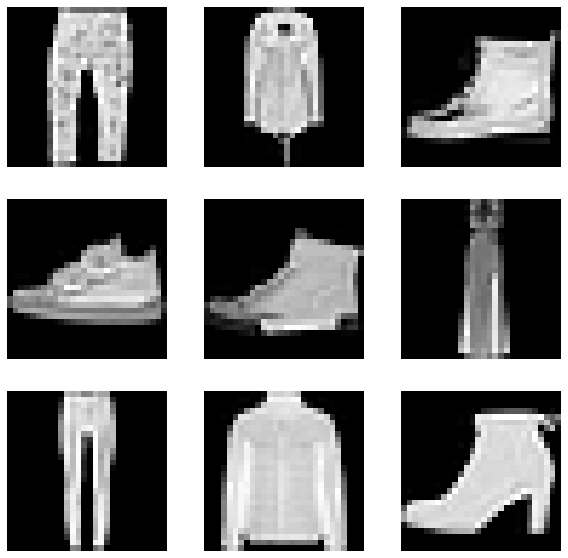

In [ ]:
#Visualize the data before proceeding to build the network 
figure = plt.figure(figsize =(10,10))
rows,cols = 3,3
for i in range(1,rows * cols + 1):
  simple_idx = torch.randint(len(train_data), size=(1,)).item()
  image, labels = train_data[simple_idx]
  figure.add_subplot(rows,cols,i)
  plt.axis('off')
  plt.imshow(image.squeeze(),cmap="gray")

In [ ]:
#Build the graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_stack_relu = nn.Sequential(
        nn.Linear(28 * 28, 512), #Input layer that will flatten our feauture map(matrix:2D array of learned features)
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10))
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_stack_relu(x)  
    return logits 

In [ ]:
#Create an instance of our computational graph  and pass it to device 
model = NeuralNetwork().to(device)

In [ ]:
#Declare the hyper parameters
epochs = 20 
learning_rate = 1e-3
batch_size = 64
loss_fn = nn.CrossEntropyLoss()#Combination of softmax and negative loss likelihood
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
#Pass the data into the dataloader 
train_loader = DataLoader(train_data,batch_size=batch_size)

In [ ]:
test_loader = DataLoader(test_data,batch_size=batch_size)

In [ ]:
#Create the training loop 
def train_loop(dataloader, model,loss_fn,optimizer):
  size  = len(dataloader.dataset)
  #Iterate through the dataset and make the predictions 
  for batch, (X,y) in enumerate(dataloader):
    pred = model(X) #make the prediction 
    loss = loss_fn(pred,y) #Calculate the distance of your model's prediction from actual value

    #Backward pass 
    optimizer.zero_grad() #Reset the model's parameters
    loss.Backward()#Calculate the gradient of the loss with respect to each weight parameter 
    optimizer.step()#Update the parameters of the model based  on gradient of the loss 

    #if the remainder of the batch is equal to zero
    if batch % 100 == 0:
      loss, current = loss.item(),batch * len(size)
      print(f"loss: {loss:>7f} [{current:5d}/{size:>5d}]")

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets 
from torchvision.transforms import ToTensor,Lambda
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype = torch.float).scatter_(0,torch.tensor(y), value=1)))

In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y), value = 1))
)

In [ ]:
#Visualize the dataset before building the computational graph 
figure = plt.figure(figsize = (10,10))
cols,rows = 3,3
for i in range(1,rows * cols + 1):
  simple_idx = torch.randint(len(train_data), size=(1,)).item()
  image,labels = train_data[simple_idx]
  figure.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")

In [ ]:
#Build the neural network 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10))
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [ ]:
model = NeuralNetwork().to(device)

In [ ]:
#Declare the hyperparameters 
epochs = 20
learning_rate = 1e-3 
batch_size = 64
loss_fn = nn.CrossEntropyLoss()
#learning algorithm/optimizer 
optimizer = torch.optim.SGD(model.parameters(),lr= learning_rate)

In [ ]:
#Define the training loop 
def train_loop(dataloader,model,loss_fn,optimizer):
  size =  len(dataloader.dataset)
  for batch,(X,y) in enumerate(dataloader):
    #Make the predictions and calculate the loss
    pred = model(X)
    loss = loss_fn(pred,y)
    #Backpropagation 
    optimizer.zero_grad() #Reset the model's parameters
    loss.Backward() #Calculate the gradient of the loss with respect to the specific model parameters
    optimizer.step() #Update the model's parameters based on the gradient of the loss 

    if batch % 100 == 0:
      loss,current = loss.item(), batch * len(size)
      print(f"Loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [ ]:
def test_loop(dataloader, model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss,correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size 
  print(f"Test Error: \n  Accuracy:{(100 * correct):>0.1f}% ,Avg loss: {test_loss:>8f}\n")

In [ ]:
#Load the training data 
train_loader = DataLoader(train_data, batch_size=64)
test_loader = DataLoader(test_data,batch_size=64)
for t in range(epochs):
  print(f"Epoch {t + 1}\n--------------------------")
  train_loop(train_loader,model,loss_fn, optimizer)
  test_loop(test_loader,model,loss_fn,optimizer)
  print('Done')